[1] Write a Python code that will simulate the Lorenz system for the time domain $t \in [0, 20]$ and plot it in 3D; the parameters to be simulated here are standard in many examples: $\sigma = 10, b = 8/3$ and $r = 28$. Large value of $r$ will put the system in a dynamical state that is highly sensitive to initial conditions. For this exercise, a preferable choice for an initial condition will be $x0 = [5,5,5]^T$ .

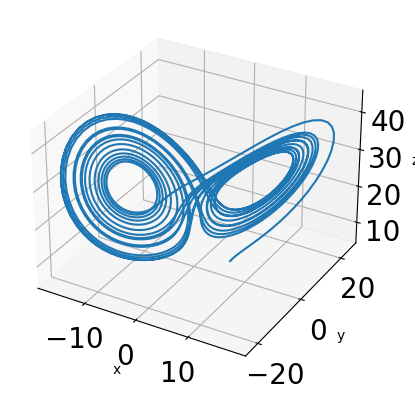

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

t = np.arange(0, 20, 0.01)
sigma = 10
b = 8 / 3
r = 28
x0 = [5, 5, 5]

def lorenz_rhs(x, t, sigma, b, r):
    dx = sigma * (x[1] - x[0])
    dy = r * x[0] - x[1] - x[0] * x[2]
    dz = x[0] * x[1] - b * x[2]
    return [dx, dy, dz]

xsol = odeint(lorenz_rhs, x0, t, args=(sigma, b, r))
x_true = xsol[:, 0]
y_true = xsol[:, 1]
z_true = xsol[:, 2]

fig1 = plt.figure(1)
ax = fig1.add_subplot(111, projection='3d')
ax.plot(x_true, y_true, z_true)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.tick_params(labelsize=20)
fig1.set_facecolor('w')

[2] With this error, the evolution of the Lorenz Equation can once again be explored. Using Python, generate eight realizations of the evolution of the Lorenz Equation using the initial conditions of Equation (2) from the Homework. Plot the time evolution of the variables $x(t), y(t)$ and $z(t)$ over the time period $t \in [0,20]$ for $\sigma=10, b=8/3,$ and $r=28$. Plot the exact evolution which we are trying to model (with $\eta_1=0$) in a thinner solid line while the initial conditions with error (with $\eta_1=1$) is a bolded line. Use $x0 =[5,5,5]^T$.

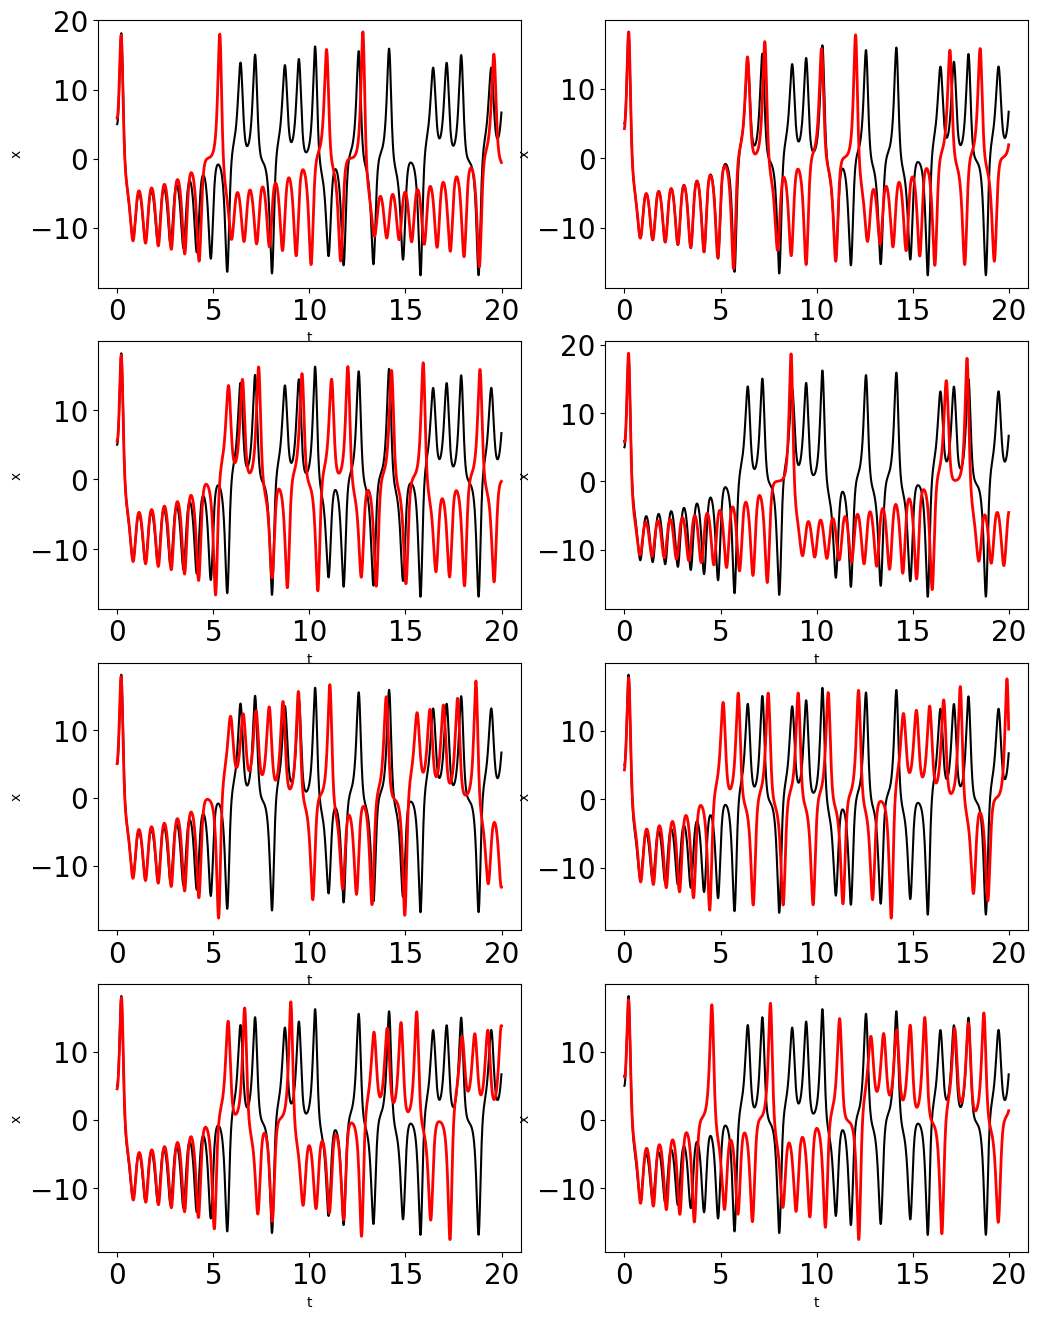

In [2]:
eta1 = 1
fig2, axs = plt.subplots(4, 2, figsize=(12, 16))
fig2.set_facecolor('w')

for j in range(8):
    xic = x0 + eta1 * np.random.randn(3)
    xsol = odeint(lorenz_rhs, xic, t, args=(sigma, b, r))
    x = xsol[:, 0]

    ax = axs[j // 2, j % 2]
    ax.plot(t, x_true, 'k')
    ax.plot(t, x, 'r', linewidth=2)
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.tick_params(labelsize=20)


[3] Using Python, plot the true time dynamics of the variable $x(t)$ over the time period $t \in [0,20]$ for $\sigma = 10, b = 8/3, r = 28$ and $x0 = [5,5,5]^T$ against experimental measurements at every half-unit of time of the true dynamics with error given by Equation (3) from the Homework with $\eta_2 = 5$.

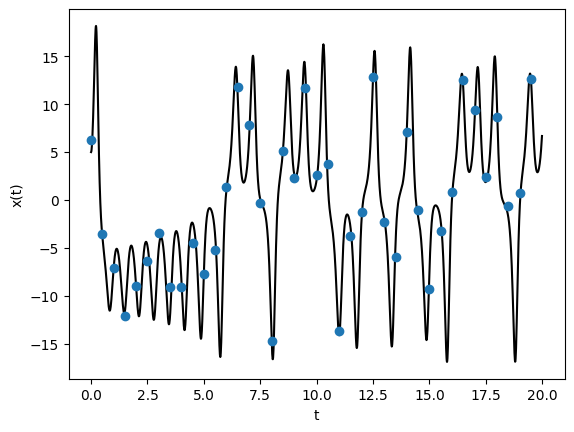

In [3]:
y = xsol[:, 1]
z = xsol[:, 2]
tdata = t[::50]
n = len(tdata)
xn = np.random.randn(n)
yn = np.random.randn(n)
zn = np.random.randn(n)
eta2 = 1
xdata = x_true[::50] + eta2 * xn
ydata = y_true[::50] + eta2 * yn
zdata = z_true[::50] + eta2 * zn

plt.plot(t, x_true, 'k')
plt.plot(tdata, xdata, 'o', linewidth=2)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

[4] Redo \#3 but with $\eta_2=1$. Compute the innovation vector that is weighted according to the Kalman gain matrix. Utilize the updated state of the system to once again project it into the future, considering the availability of new observational data. Finally, plot the data assimilated solution in bold line against the true dynamics (line) along with the experimental measurements (dots).

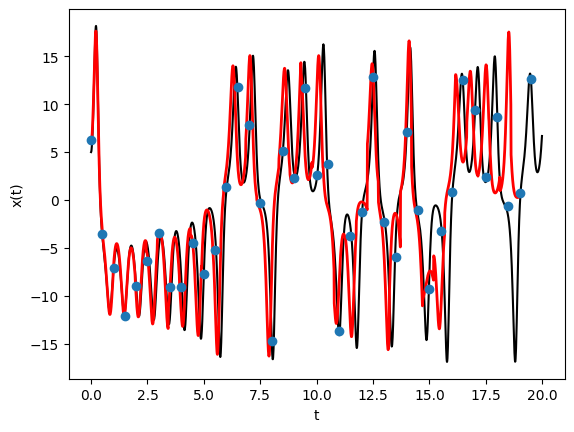

In [4]:
# Data assimilation
x_da = []
xic0 = 0
for j in range(len(tdata)-1):
    tspan = np.arange(tdata[j], tdata[j+1], 0.01)
    xsol1 = odeint(lorenz_rhs, xic, tspan, args=(sigma, b, r))
    xic0 = xsol1[-1, :]
    xdat = np.array([xdata[j+1], ydata[j+1], zdata[j+1]])
    K = eta1 / (eta1 + eta2)
    xic = xic0 + K * (xdat - xic0)
    x_da.extend(xsol1[:-1])

x_da = np.vstack([x_da, xsol1[-1]])

plt.plot(t, x_true, 'k')
plt.plot(t[:len(x_da)], x_da[:, 0], 'r', linewidth=2)
plt.plot(tdata, xdata, 'o', linewidth=2)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

[5] What can you say about the direct simulation of the noisy initial conditions' ability to predict the true dynamics beyond a certain time?

**Ans:** The model dynamics using a direct numerical simulation of the noisy initial conditions shows that direct simulation fails to predict the true dynamics beyond t $\approx$ 5.

[6] What happens to the solution when making use of the data assimilation technique and the data measurements?

**Ans:** When making use of the data assimilationa technique and the data measurements (circles), the solution simply sticks close to the true solution for a much longer time with much smaller deviation; which makes data assimilation a great tool that can greatly extend the time window under which the model can be useful.


[7] What conclusion can you make about the use of data assimilation in this exercise? Can you create an error plot to justify you conclusion?

**Ans:** The assimilated data solution significantly extends the time window within which the model prediction remains valid.

Some of the error plot codes are below. In the code below we compute the squared errors for both the numerical integration of the noisy initial conditions and the data assimilation cases. Then, we compute the RMSE by taking the square root of the mean of the squared errors. Finally, we plot the RMSE for both cases using a bar plot, comparing the errors between the numerical integration and data assimilation approaches.

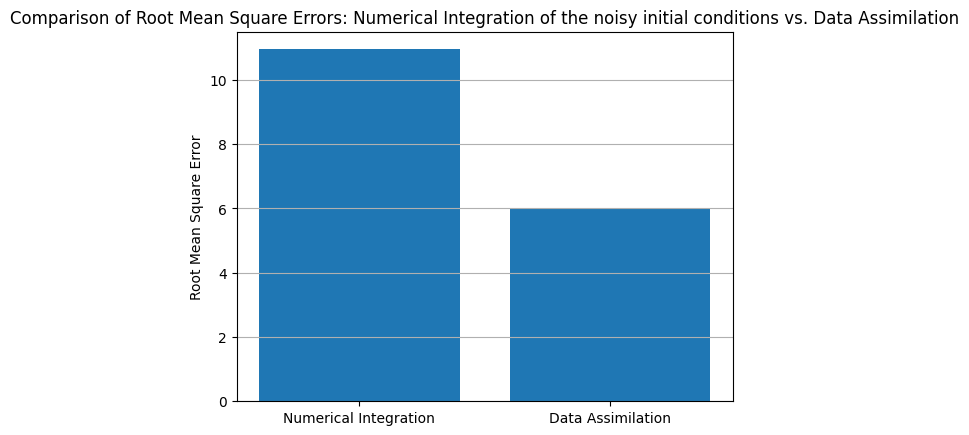

In [5]:
# Truncate or interpolate x_da to match the size of x_true
x_da_interp = np.interp(t, t[:len(x_da)], x_da[:, 0])

# Calculate squared errors
squared_error_sol = (x_true - xsol[:, 0]) ** 2
squared_error_da = (x_true - x_da_interp) ** 2

# Calculate root mean square errors
rmse_sol = np.sqrt(np.mean(squared_error_sol))
rmse_da = np.sqrt(np.mean(squared_error_da))

# Plot the RMSE
plt.bar(['Numerical Integration', 'Data Assimilation'], [rmse_sol, rmse_da])
plt.ylabel('Root Mean Square Error')
plt.title('Comparison of Root Mean Square Errors: Numerical Integration of the noisy initial conditions vs. Data Assimilation')
plt.grid(axis='y')
plt.show()

In the code below, we compute the cumulative sum of the squared errors up to each time step and divide it by the number of data points up to that time step to get the cumulative RMSE at each time step. Finally, we plot the time series of RMSE for both cases, showing how the error evolves over time.

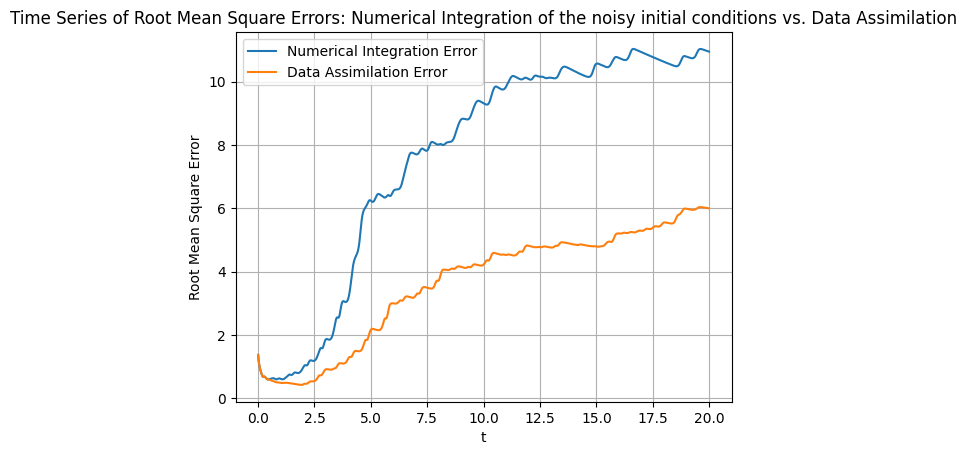

In [6]:
# Time series of RMSE
rmse_sol_ts = np.sqrt(np.cumsum(squared_error_sol) / np.arange(1, len(squared_error_sol) + 1))
rmse_da_ts = np.sqrt(np.cumsum(squared_error_da) / np.arange(1, len(squared_error_da) + 1))

# Plot the time series of RMSE
plt.plot(t, rmse_sol_ts, label="Numerical Integration Error")
plt.plot(t, rmse_da_ts, label="Data Assimilation Error")
plt.xlabel('t')
plt.ylabel('Root Mean Square Error')
plt.legend()
plt.title('Time Series of Root Mean Square Errors: Numerical Integration of the noisy initial conditions vs. Data Assimilation')
plt.grid(True)
plt.show()